# Twitter Sentiment Analysis

### Dataset : Twitter Data

#### Important Requried Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

#### Import Dataset

In [3]:
data = pd.read_csv('Twitter_Data.csv')

In [4]:
data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [5]:
data.tail()

,clean_text,category
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0
162979,have you ever listen about like gurukul where ...,1.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


### Data Cleaning (Text Cleaning – MOST IMPORTANT)

In [7]:
data.isnull().sum()


clean_text    4
category      7
dtype: int64

In [8]:
data.dropna(inplace=True)


In [9]:
data.isna().sum()

clean_text    0
category      0
dtype: int64

### Text Preprocessing

In [10]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text

data['clean_text'] = data['clean_text'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\OPTIMUSs\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


### Sentiment Distribution (Visualization)

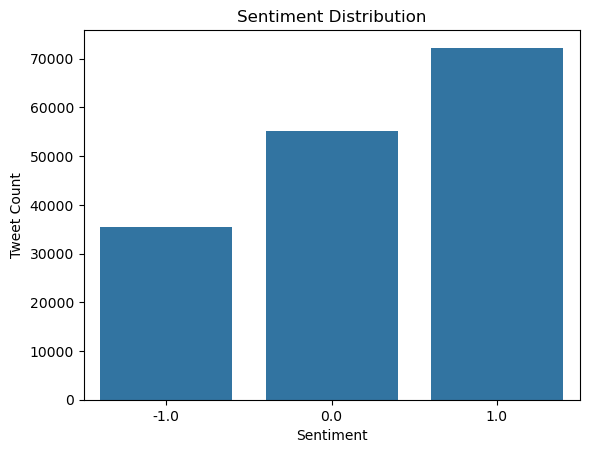

In [12]:
sns.countplot(x='category', data=data)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()


### Feature Engineering (Text → Numbers)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

X = data['clean_text']
y = data['category']

vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)


### Train-Test Split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42
)


### Model 1: Naive Bayes (Baseline Model)

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Accuracy: 0.7270970117199484
              precision    recall  f1-score   support

        -1.0       0.88      0.44      0.58      7152
         0.0       0.84      0.66      0.74     11067
         1.0       0.65      0.93      0.77     14375

    accuracy                           0.73     32594
   macro avg       0.79      0.67      0.70     32594
weighted avg       0.77      0.73      0.72     32594



### Model 2: Support Vector Machine (Better Accuracy)

In [17]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Accuracy: 0.9025894336380929
              precision    recall  f1-score   support

        -1.0       0.88      0.81      0.85      7152
         0.0       0.88      0.97      0.92     11067
         1.0       0.93      0.89      0.91     14375

    accuracy                           0.90     32594
   macro avg       0.90      0.89      0.89     32594
weighted avg       0.90      0.90      0.90     32594



### Model Comparison Visualization

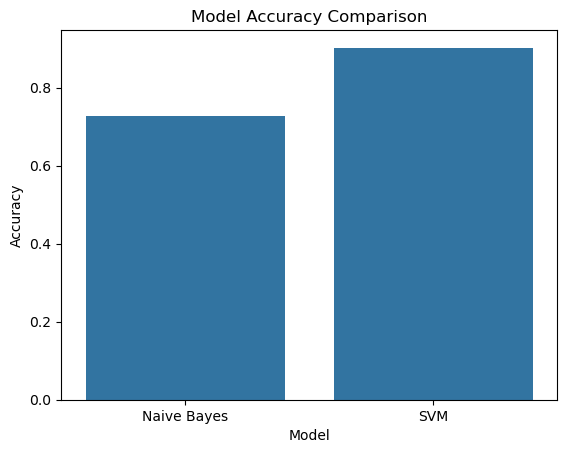

In [18]:
model_acc = pd.DataFrame({
    'Model': ['Naive Bayes', 'SVM'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_nb),
        accuracy_score(y_test, y_pred_svm)
    ]
})

sns.barplot(x='Model', y='Accuracy', data=model_acc)
plt.title("Model Accuracy Comparison")
plt.show()


### Word Cloud

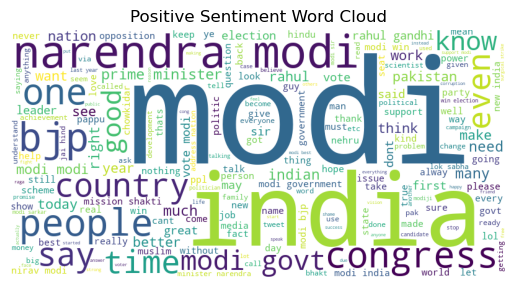

In [20]:
from wordcloud import WordCloud

positive_text = " ".join(data[data['category']==1]['clean_text'])

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(positive_text)

plt.imshow(wordcloud)
plt.axis('off')
plt.title("Positive Sentiment Word Cloud")
plt.show()


### Insights from Analysis

##### Sentiment Insights

Positive tweets dominate (or negative – depends on data)

Neutral tweets indicate informational content

Negative tweets highlight complaints & issues

### Description

Built a Sentiment Analysis model on Twitter data using NLP techniques such as text preprocessing and TF-IDF vectorization. Implemented Naive Bayes and SVM classifiers to classify tweets into positive, negative, and neutral sentiments and visualized sentiment trends.

# Completed